In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('/Users/shreyamchaudhary/Downloads/spam.csv', encoding='utf-8', encoding_errors='ignore')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4448,spam,Urgent UR awarded a complimentary trip to Euro...,NaN,NaN,NaN
1871,ham,Dont know supports ass and srt i thnk. I think...,NaN,NaN,NaN
4655,ham,"K, I'll work something out",NaN,NaN,NaN
2407,ham,Solve d Case : A Man Was Found Murdered On &l...,NaN,NaN,NaN
1152,ham,Ok i go change also...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing 
# 4. Model Building
# 5. Evaluation 
# 6. Improvement
# 7. Website
# 8. Deploy

### 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True) 

In [8]:
df.sample(5)

,v1,v2
3809,ham,"Aight, can you text me the address?"
142,ham,A swt thought: \Nver get tired of doing little...
265,ham,Same. Wana plan a trip sometme then
4484,ham,What not under standing.
2513,spam,U have won a nokia 6230 plus a free digital ca...


In [9]:
# renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
5068,ham,Hai dear friends... This is my new &amp; prese...
1857,ham,I hate when she does this. She turns what shou...
5222,ham,5 nights...We nt staying at port step liao...T...
1075,ham,Oi. Ami parchi na re. Kicchu kaaj korte iccha ...
1873,spam,You have WON a guaranteed 1000 cash or a 2000 ...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# checking the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values 
df.duplicated().sum()

404

In [15]:
# Removing the duplicates 
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
 df.shape

(5168, 2)

## 2.EDA

In [18]:
df.value_counts()

target  text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        That's cause your old. I live to be high.                                                                                             1
        Thanx a lot...                                                                                                                        1
        Thanx a lot 4 ur help!                                                                                                                1
        Thanx 4 the time weve spent 2geva, its bin mint! Ur my Baby and all I want is u!xxxx                                                  1
                                                                                                                                             

In [19]:
df['target'].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

In [20]:
# Visualizing the ham and span 
import matplotlib.pyplot as plt

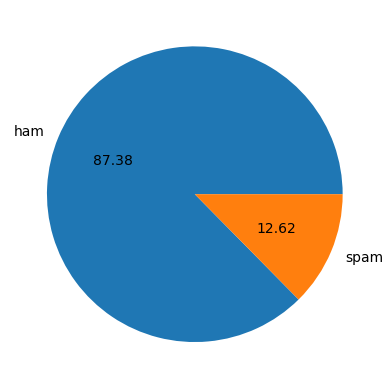

In [21]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreyamchaudhary/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# No of characters in each sentence
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# No of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
# No of sentences in each line
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# Analysing the ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# Analysing the spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


# Note : Span messages are much longer as compared to spam messages 
# may be in terms of word use , characters, or sentences used

In [34]:
# ploting the histogram 
import seaborn as sns

/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

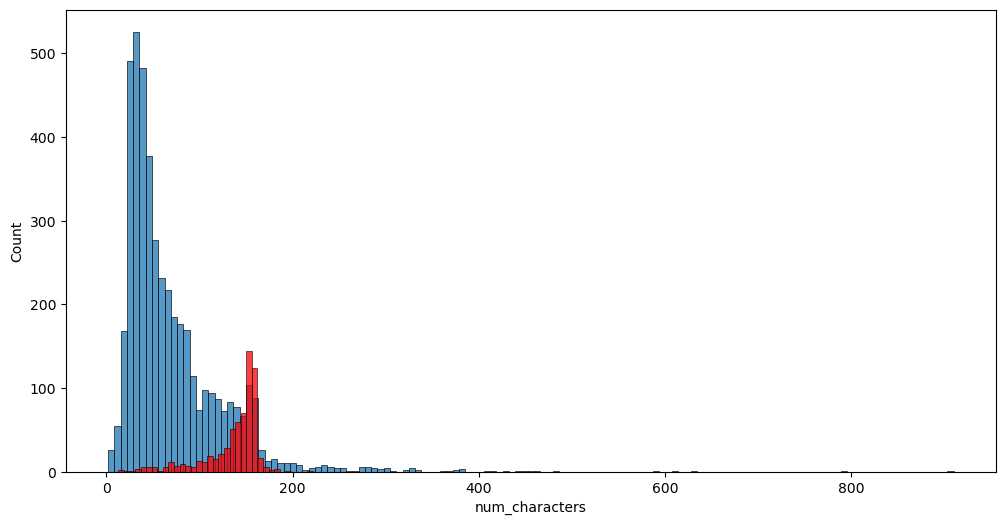

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

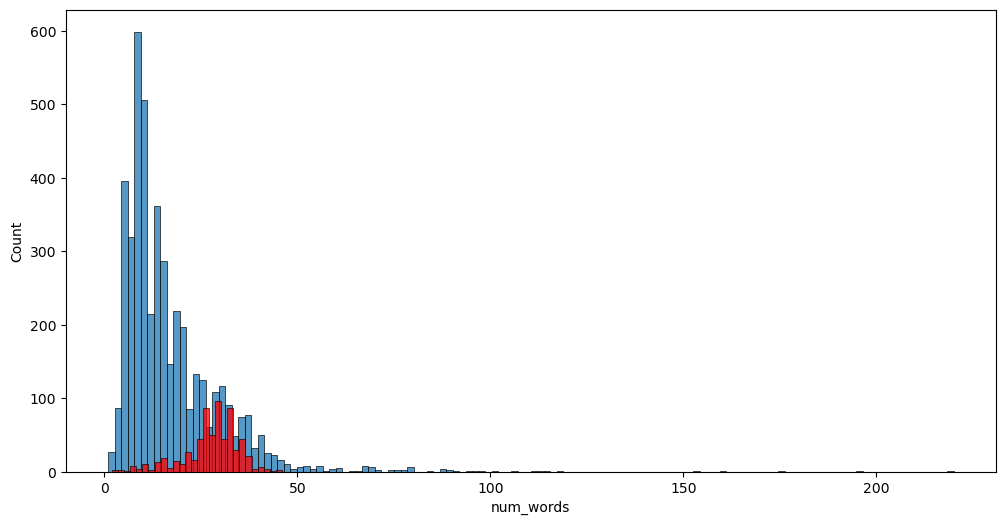

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

In [37]:
# Realtionship b/w Columns

/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option

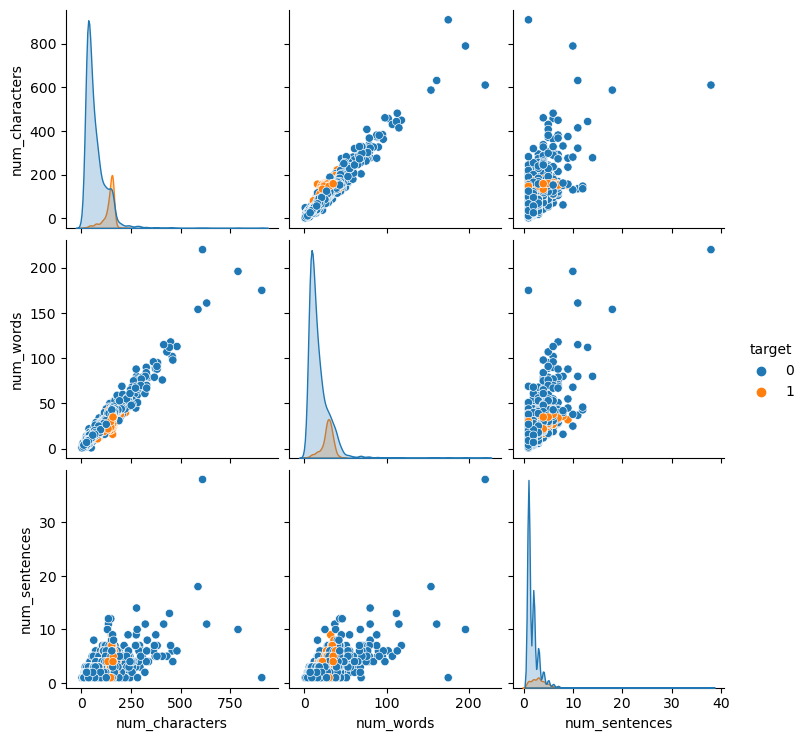

In [38]:
sns.pairplot(df, hue = 'target')

### The Pearson coefficient is a mathematical correlation coefficient representing the relationship between two variables, denoted as X and Y.
### Pearson coefficients range from +1 to -1, with +1 representing a positive correlation, -1 representing a negative correlation, and 0 representing no relationship.

## Text Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [39]:
from nltk.corpus import stopwords
import string

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [42]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [43]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

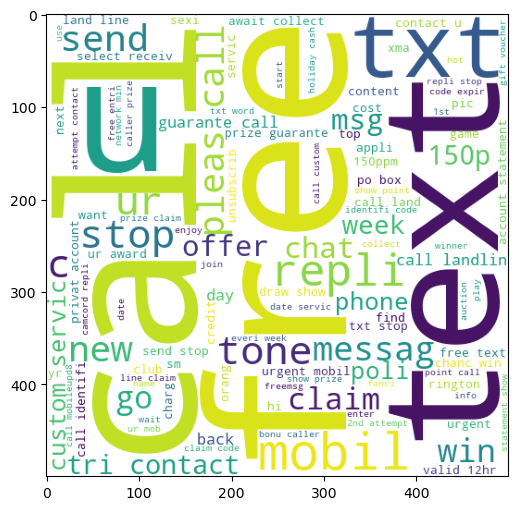

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

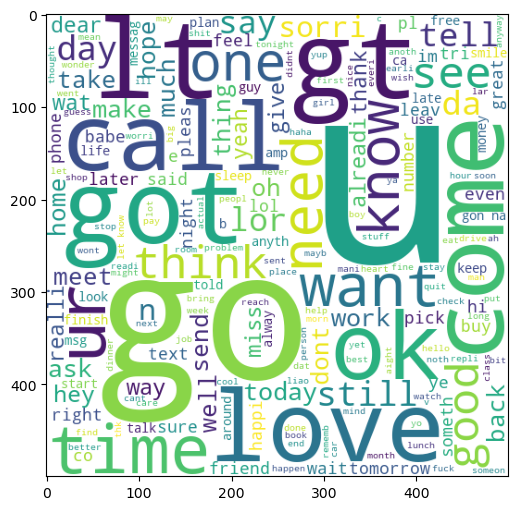

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

10106

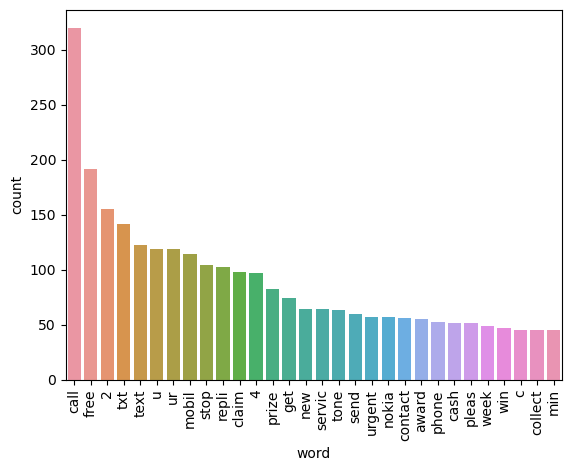

In [54]:
from collections import Counter
most_common_30 = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the most common items
df_most_common = pd.DataFrame(most_common_30, columns=['word', 'count'])

# Plot the barplot
sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

35380

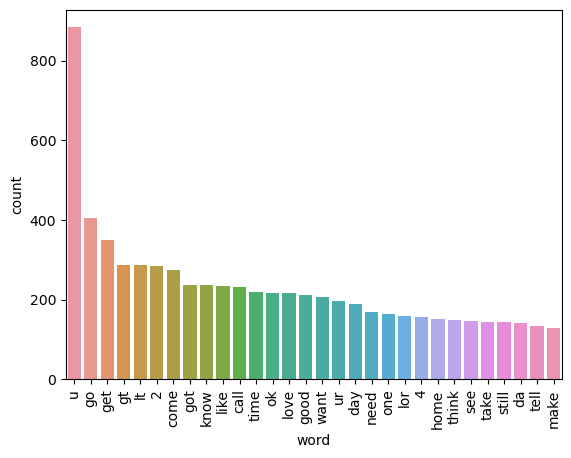

In [57]:
most_common_30 = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the most common items
df_most_common = pd.DataFrame(most_common_30, columns=['word', 'count'])

# Plot the barplot
sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

In [58]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5168, 3000)

In [62]:
y = df['target'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [70]:
# tfidf --> MNB

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9834710743801653)

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9834710743801653
For  KN
Accuracy -  0.9013539651837524
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8695652173913043
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9611650485436893
For  RF
Accuracy -  0.9671179883945842
Precision -  0.9908256880733946


/opt/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8787878787878788
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9458413926499033
Precision -  0.9381443298969072
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9655172413793104


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.901354,1.000000
2,NB,0.970019,1.000000
5,RF,0.967118,0.990826
0,SVC,0.976789,0.983471
8,ETC,0.971954,0.974576
10,xgb,0.968085,0.965517
4,LR,0.955513,0.961165
6,AdaBoost,0.960348,0.946429
9,GBDT,0.945841,0.938144
7,BgC,0.960348,0.878788


In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [80]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.901354
1,NB,Accuracy,0.970019
2,RF,Accuracy,0.967118
3,SVC,Accuracy,0.976789
4,ETC,Accuracy,0.971954
5,xgb,Accuracy,0.968085
6,LR,Accuracy,0.955513
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.945841
9,BgC,Accuracy,0.960348


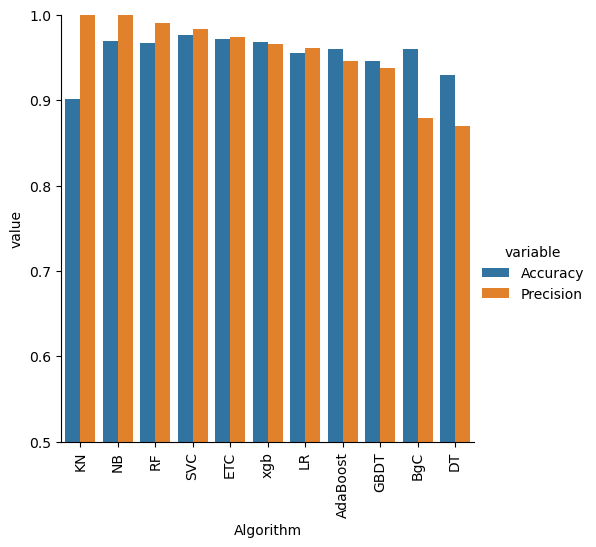

In [81]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [84]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [85]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [87]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.901354,1.000000,0.901354,1.000000,0.901354,1.000000,0.901354,1.000000
1,NB,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000
2,RF,0.967118,0.990826,0.967118,0.990826,0.967118,0.990826,0.967118,0.990826
3,SVC,0.976789,0.983471,0.976789,0.983471,0.976789,0.983471,0.976789,0.983471
4,ETC,0.971954,0.974576,0.971954,0.974576,0.971954,0.974576,0.971954,0.974576
5,xgb,0.968085,0.965517,0.968085,0.965517,0.968085,0.965517,0.968085,0.965517
6,LR,0.955513,0.961165,0.955513,0.961165,0.955513,0.961165,0.955513,0.961165
7,AdaBoost,0.960348,0.946429,0.960348,0.946429,0.960348,0.946429,0.960348,0.946429
8,GBDT,0.945841,0.938144,0.945841,0.938144,0.945841,0.938144,0.945841,0.938144
9,BgC,0.960348,0.878788,0.960348,0.878788,0.960348,0.878788,0.960348,0.878788


In [90]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))